# Import Modules

In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.gridspec import GridSpec

from datetime import datetime, timedelta

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [188]:
df = pd.read_csv('Data/bank-full.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Exploratory Data Analysis (EDA)

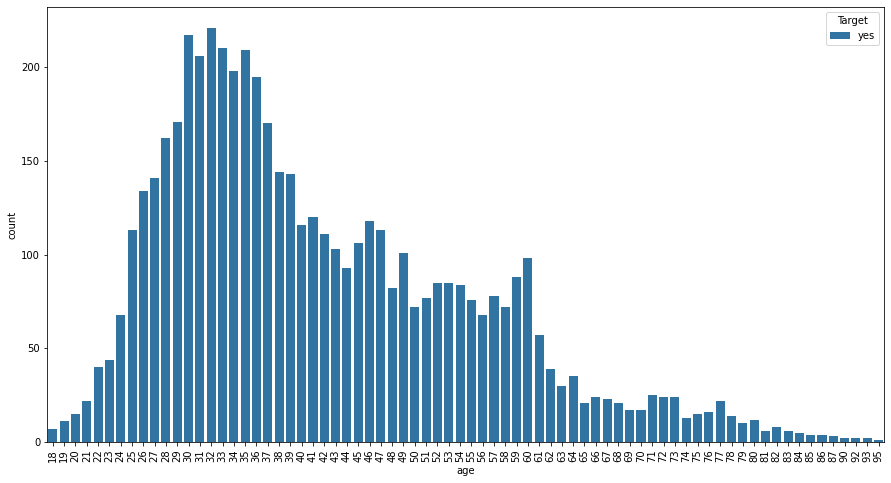

In [189]:
target = df[df['Target']=='yes']

plt.figure(figsize=(15,8))
sns.countplot(x='age', hue='Target', data=target)
plt.xticks(rotation=90);

In [190]:
def age_segmenting(x):
    if x>=18 and x<=25:
        return '18-25'
    
    elif x>25 and x<=40:
        return '25-40'
    
    elif x>40 and x<=65:
        return '40-65'
    
    else:
        return '65+'

df['age'] = df['age'].map(age_segmenting)

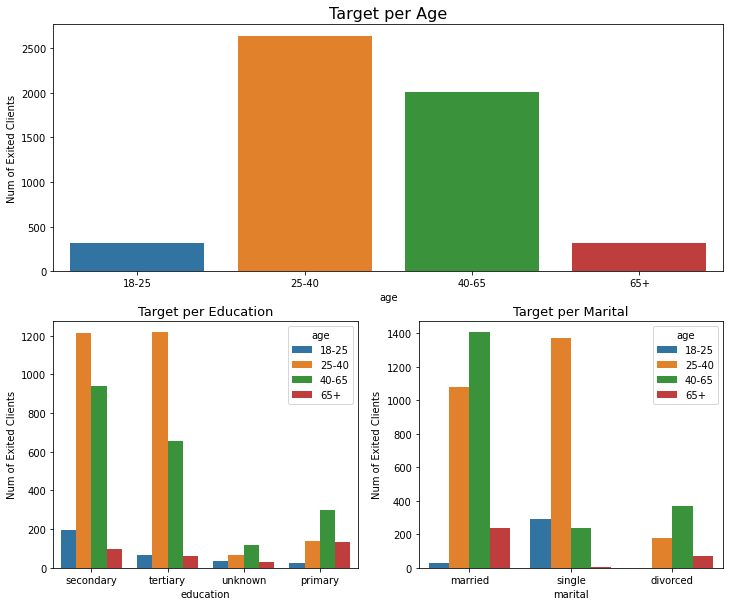

In [191]:
target = df[df['Target']=='yes']

fig = plt.figure(figsize=(12,10))
spec2 = GridSpec(ncols=2, nrows=2, figure=fig)
ax1 = fig.add_subplot(spec2[0, 0:])
ax2 = fig.add_subplot(spec2[1, 0])
ax3 = fig.add_subplot(spec2[1, 1])


ax1.set_title('Target per Age', size=16)
sns.countplot(x='age', order=['18-25','25-40','40-65','65+'], data=target, ax=ax1)
ax1.set_ylabel('Num of Exited Clients')

ax2.set_title('Target per Education', size=13)
sns.countplot(x='education', hue='age', hue_order=['18-25','25-40','40-65','65+'], data=target, ax=ax2)
ax2.set_ylabel('Num of Exited Clients')

ax3.set_title('Target per Marital', size=13)
sns.countplot(x='marital', hue='age', hue_order=['18-25','25-40','40-65','65+'], data=target, ax=ax3)
ax3.set_ylabel('Num of Exited Clients')


plt.show()

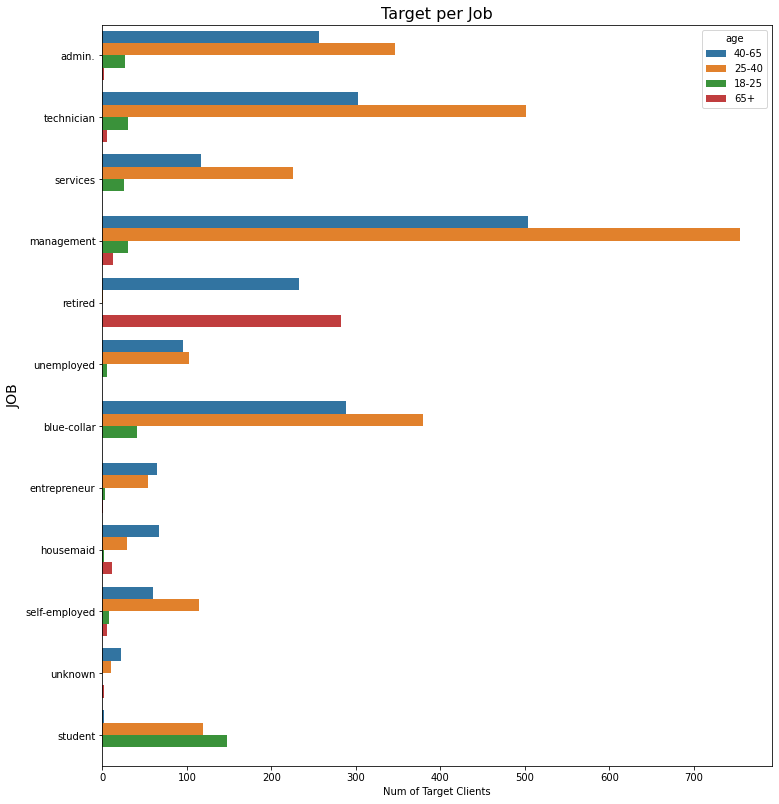

In [200]:
target = df[df['Target']=='yes']

fig = plt.figure(figsize=(12,30))
spec2 = GridSpec(ncols=2, nrows=2, figure=fig)
ax1 = fig.add_subplot(spec2[0, 0:])

ax1.set_title('Target per Job', size=16)
sns.countplot(y='job', hue='age', data=target, ax=ax1)
ax1.set_xlabel('Num of Target Clients')
ax1.set_ylabel(ax1.get_ylabel().upper(), size=14)

plt.show()

# Preprocessing

## Converting Categorical values

In [183]:
def encoding_cat(data, *out):
    """This function converts all the categorical values of the DataFrame "data" into [0,1].
    
       It uses OneHotEncoder for multiple categorical values (>2)
       It uses LabelEncoder for binary categorical values
       
       - data: Pandas DataFrame
       - out: Columns of DataFrame that we don't want to convert
    """
    columns = data.keys()
    
    for col in columns:
        # Sometime not all the columns are need
        if col not in out:
            labels = list(data[col].unique())
            labels.sort()
            
            # Only with categorical values
            if isinstance(labels[0], str):
                
                # OneHotEncoder
                if len(labels)>2:
                    ohe = OneHotEncoder(sparse=False)
                    data[labels]=ohe.fit_transform(data[[col]])
                    data.drop(columns=col, inplace=True)
                
                # LabelEncoder
                else:
                    le = LabelEncoder()
                    data[col]=le.fit_transform(data[col])
    return data

df = encoding_cat(df, 'month')

## Converting date to cyclic value

In [184]:
df['date'] =  pd.to_datetime(df['month'] +' '+ df['day'].astype(str) + ' 2021', format=('%b %d %Y'))
df.drop(columns =['day','month'], inplace=True)
days_per_month = 365.25/12
df['date'] = df['date'].dt.month + df['date'].dt.day/days_per_month
df['date'] = np.sin(df['date']/df['date'].max())

In [185]:
df.head(2)

,default,balance,housing,loan,duration,campaign,pdays,previous,Target,18-25,...,single,primary,secondary,tertiary,cellular,telephone,failure,other,success,date
0,0,2143,1,0,261,1,-1,0,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.386365
1,0,29,1,0,151,1,-1,0,0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.386365
